### IMDB Spoiler Dataset Overview

The IMDB Spoiler Dataset comprises two primary files, providing a comprehensive collection of user-generated reviews and metadata about movies and TV shows.

#### IMDB_reviews.json:

- **review_date:** Date when the review was written.
- **movie_id:** A unique identifier for the item, linking it to corresponding metadata in the IMDB_movie_details.json file.
- **user_id:** A unique identifier for the author of the review.
- **is_spoiler:** A binary indicator specifying whether the review contains spoilers or not.
- **review_text:** The textual content of the user's review, providing insights into their opinions and thoughts about the item.
- **rating:** The numerical rating assigned by the user to the item.
- **review_summary:** A concise summary accompanying the review, offering a quick overview of the user's sentiments.

#### IMDB_movie_details.json:

- **movie_id:** A unique identifier linking to the corresponding reviews in the IMDB_reviews file.
- **plot_summary:** A non-spoiler plot summary providing a brief overview of the item's storyline.
- **duration:** The runtime duration of the item.
- **genre:** The associated genres of the item.
- **rating:** The overall rating assigned to the item.
- **release_date:** The date when the item was released.
- **plot_synopsis:** A detailed synopsis of the item's plot, potentially containing spoiler content.

This dual-file dataset allows for a holistic understanding of user reviews, incorporating both textual sentiments and metadata associated with the movies and TV shows. The inclusion of spoiler indicators and non-spoiler plot summaries provides a valuable foundation for training and evaluating a deep learning model aimed at predicting and identifying spoilers within user reviews.


The **objective** of the project involves employing Natural Language Processing (NLP) techniques, specifically deep learning models, to address the challenge of identifying spoilers in IMDb reviews.

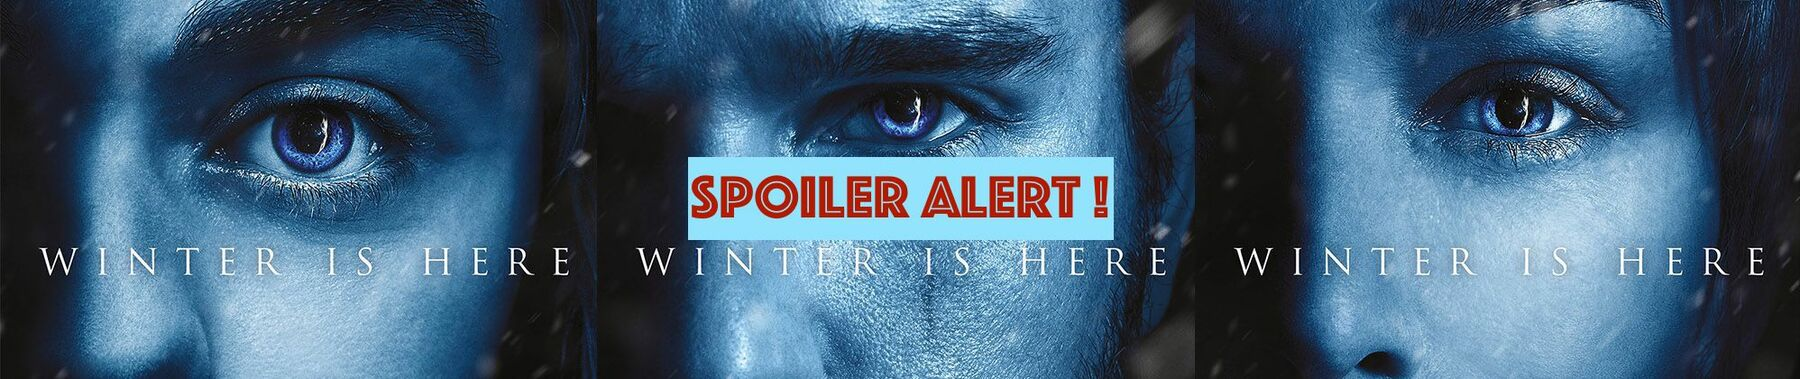

---




***This is where you come in!***  

Name: Balaji Gurusala
Email: balaji.gsb@gmail.com

**Problem Statement ->** Your goal is to develop a system wherein given a review, the model needs to determine whether it contains spoilers or not. This involves understanding the contextual nuances and language intricacies that signify potential plot revelations.


**Steps**
1. Data Collection, Exploration and Preprocessing
2. EDA
3. Pre-Modelling Data Preparation
4. Model Building
5. Model Evaluation
6. Summary



---



**Load Previously Saved Data Frames & Ouputs**

In [1]:
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

In [2]:
#!pip install -U sentence-transformers

In [3]:
#!pip install -U transformers huggingface_hub

## Data Collection, Exploration and Preprocessing

In [4]:
# ## 1. Data Collection

# Import necessary libraries and modules
import os
import torch  # Import the PyTorch library
from datetime import datetime  # Import the datetime module for time tracking
import gdown
import zipfile
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Load Previously Saved Data

In [5]:
# Load EVERYTHING from previously saved data & ouputs
import pickle
import pandas as pd
import os

if os.path.exists('/kaggle/working/similarity_scores_spoiler.pkl'):
    print('Loading similarity_scores_spoiler outputs')
    with open('/kaggle/working/similarity_scores_spoiler.pkl', 'rb') as f:
        similarity_scores_spoiler = pickle.load(f)
else:
    print('✗ similarity_scores_spoiler not found')

if os.path.exists('/kaggle/working/similarity_scores_non_spoiler.pkl'):
    print('Loading similarity_scores_non_spoiler outputs')
    with open('/kaggle/working/similarity_scores_non_spoiler.pkl', 'rb') as f:
        similarity_scores_non_spoiler = pickle.load(f)
else:
    print('✗ similarity_scores_non_spoiler not found')

if os.path.exists('/kaggle/working/similarity_scores_embeddings_spoiler.pkl'):
    print('Loading similarity_scores_embeddings_spoiler ouputs')
    with open('/kaggle/working/similarity_scores_embeddings_spoiler.pkl', 'rb') as f:
        similarity_scores_embeddings_spoiler = pickle.load(f)
else:
    print('✗ similarity_scores_embeddings_spoiler not found')
        
if os.path.exists('/kaggle/working/similarity_scores_embeddings_non_spoiler.pkl'):   
    with open('/kaggle/working/similarity_scores_embeddings_non_spoiler.pkl', 'rb') as f:
        similarity_scores_embeddings_non_spoiler = pickle.load(f)
else:
    print('✗ similarity_scores_embeddings_spoiler not found')

if os.path.exists('/kaggle/working/df_both_checkpoint.csv'):
    print('Loading df_both_checkpoint DataFrame')
    df_both = pd.read_csv('/kaggle/working/df_both_checkpoint.csv')
else:
    print('✗ df_both_checkpoint not found')

print("✓ Loaded All the ouputs & Data Frame!")

Loading similarity_scores_spoiler outputs
Loading similarity_scores_non_spoiler outputs
Loading similarity_scores_embeddings_spoiler ouputs
Loading df_both_checkpoint DataFrame
✓ Loaded All the ouputs & Data Frame!


In [6]:
df_both.head()

,review_date,movie_id,user_id,is_spoiler,review_text,rating_x,review_summary,plot_summary,duration,genre,rating_y,release_date,plot_synopsis,word_count,similarity_to_plot,embeddings_similarity_to_plot,review_text_processed
0,10 February 2006,tt0111161,ur1898687,True,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.,Chronicles the experiences of a formerly succe...,2h 22min,"['Crime', 'Drama']",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker...",843,0.016612,0.512277,oscar year shawshank redemption written direct...
1,6 September 2000,tt0111161,ur0842118,True,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.,Chronicles the experiences of a formerly succe...,2h 22min,"['Crime', 'Drama']",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker...",223,0.012685,0.720940,shawshank redemption without doubt one brillia...
2,3 August 2001,tt0111161,ur1285640,True,I believe that this film is the best story eve...,8,The best story ever told on film,Chronicles the experiences of a formerly succe...,2h 22min,"['Crime', 'Drama']",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker...",250,0.016893,0.737935,believe film best story ever told film tell ti...
3,1 September 2002,tt0111161,ur1003471,True,"**Yes, there are SPOILERS here**This film has ...",10,Busy dying or busy living?,Chronicles the experiences of a formerly succe...,2h 22min,"['Crime', 'Drama']",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker...",741,0.018187,0.280551,yes spoiler film emotional impact find hard wr...
4,20 May 2004,tt0111161,ur0226855,True,At the heart of this extraordinary movie is a ...,8,"Great story, wondrously told and acted",Chronicles the experiences of a formerly succe...,2h 22min,"['Crime', 'Drama']",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker...",829,0.017087,0.643839,heart extraordinary movie brilliant indelible ...


### **Model Training - Tips and Tricks**
- Since the dataset is huge, you can train the model on a **smaller subset of data**. This will reduce both the training time & the compute required. Just observe the class distribution to decide how do you want to take a subset- if the dataset is highly imbalanced, we would suggest you to do a majority undersampling to reduce the size of data, otherwise do a stratified sampling to ensure the same event rate as that of population.
- We encourage you to try out several model architectures and algorithms such as simple feed forward neural networks, Neural Networks based embeddings followed by classical models such as Logistic regression, RNNs/LSTMs and Transformer based models such as BERT.
- If you wish to train large models such as BERT, you will require access to GPUs. Colab provides access to GPUs, but it requires you to interactively work on the notebook.
Therefore, it is strongly recommended that you utilize Kaggle wherever possible. Kaggle offers you 35 hours of High Performance Multi-GPU compute per week.
- It is often assumed that Kaggle is just a notebook based environment, and you need to actively interact with the notebook to keep it running. The same isn’t true. You can easily run your notebooks as asynchronous jobs on Kaggle, save your models/datasets as outputs, and load those outputs (models/datasets) for further analysis.
- This guide, although a bit old explains how to commit and run your Kaggle notebooks and use their outputs later: https://towardsdatascience.com/saving-and-loading-pytorch-models-in-kaggle-3dadc0af1bd9

## Modeling

### Train, Validation and Test Split

In [7]:
from sklearn.model_selection import train_test_split

## create 3 subsets of data- train, validation & test with 70,15 & 15 percent respectively!
X = df_both['review_text_processed']
y = df_both['is_spoiler']

# First split: 70% train, 30% temp (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, 
    test_size=0.30, 
    random_state=42,
    stratify=y
)

# Second split: Split the 30% into 50-50 (15% each for validation and test)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, 
    test_size=0.50, 
    random_state=42,
    stratify=y_temp
)

# Verify splits
print(f"Train set size: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
print(f"Validation set size: {len(X_val)} ({len(X_val)/len(X)*100:.1f}%)")
print(f"Test set size: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")


Train set size: 401734 (70.0%)
Validation set size: 86086 (15.0%)
Test set size: 86086 (15.0%)


**Take measures to fix class imbalance either by using SMOTE or Class weights**

In [8]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Step 1: Compute class weights based on training data
class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(y_train),
    y=y_train
)

# Step 2: Create dictionary mapping class to weight
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

print(f"Class weight for Non-Spoiler (0): {class_weight_dict[0]:.4f}")
print(f"Class weight for Spoiler (1): {class_weight_dict[1]:.4f}")
print(f"Weight ratio (Spoiler/Non-Spoiler): {class_weight_dict[1]/class_weight_dict[0]:.2f}x")

Class weight for Non-Spoiler (0): 0.6784
Class weight for Spoiler (1): 1.9013
Weight ratio (Spoiler/Non-Spoiler): 2.80x


In [9]:
print(X_train[0])

oscar year shawshank redemption written directed frank darabont novella rita hayworth shawshank redemption stephen king nominated seven academy award walked away zero best picture went forrest gump shawshank pulp fiction happy nominated course hindsight history look back gump good film pulp redemption remembered time best pulp however success word go making huge splash cannes making writer director american master two film andy dufresne co success come easy fortunately failure life sentence opening screen take film fell fast theatre finished mere reason failure many firstly title clunker iconic fan today people knew cared shawshank dvd tim robbins laugh recounting fan congratulating rickshaw movie marketing wise film nightmare prison drama tough sell woman story love two best friend spell winner men worst movie slow molasses desson thomson writes washington post wanders subplots every opportunity ignores abundance narrative exit point settling finale weakness make film strong firstly s

In [10]:
print(y_train[0])

True


### BERT Model finetuning using HuggingFace Transformers & Pytorch
Again, similar to previous parts, this one can also be done in multiple ways like using a HuggingFace trainer class which kind of abstracts the Pytorch training loops, we encourage you to explore that approach as well! But since one of the objectives of the project is also to get more hands-on on Pytorch framework, its Dataloader classes etc, we expect you to attempt this using Pytorch!

### Required Imports

In [11]:
import torch.nn as nn  # Import PyTorch's neural network module
import torch.optim as optim
from transformers import AutoTokenizer, AutoModelForSequenceClassification  # Import specific modules from the Hugging Face Transformers library
from datasets import load_dataset  # Import a function to load datasets
from torch.utils.data import Dataset, DataLoader, TensorDataset  # Import PyTorch data loading utilities
from tqdm import tqdm  # Import tqdm for progress tracking
import os  # Import the os module for operating system-related functions
from sklearn.metrics import classification_report, roc_auc_score, f1_score, confusion_matrix

### Model Training Steps

In [12]:
# Step-1

## Set the device to GPU if available, otherwise use CPU
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(device)

cuda


### Create Stratified Train/Test Split

In [13]:
# Create 50% Stratified Sample from Training Set (for BERT)

X_train_bert, _, y_train_bert, _ = train_test_split(
    X_train, y_train,
    train_size=0.30,  # 30% of training data
    random_state=42,
    stratify=y_train   # Preserve class distribution
)

# Reset indices for cleaner data
X_train_bert = X_train_bert.reset_index(drop=True)
y_train_bert = y_train_bert.reset_index(drop=True)

# Also reset for other splits (needed for PyTorch)
X_val = X_val.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

y_train_bert = y_train_bert.astype(int)
y_val = y_val.astype(int)
y_test = y_test.astype(int)


### Create Datasets

### Dataset for Bert Base

In [14]:
## Create PyTorch Dataset
class ReviewDataset(Dataset):
  
    def __init__(self, texts, labels, tokenizer, max_length=256):
        """
        Args:
            texts: List of review texts
            labels: List of binary labels (0 or 1)
            tokenizer: HuggingFace tokenizer
            max_length: Maximum sequence length
        """
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length
    
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        """Tokenize text and return as PyTorch tensors"""
        text = self.texts[idx]
        label = self.labels[idx]
        
        # Tokenize
        encoding = self.tokenizer(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        
        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Create datasets
print("Loading bert-base-uncased tokenizer...")
MODEL_NAME = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

print("Creating datasets...")
train_dataset = ReviewDataset(
    X_train_bert.values,
    y_train_bert.values,
    tokenizer,
    max_length=256
)

val_dataset = ReviewDataset(
    X_val.values,
    y_val.values,
    tokenizer,
    max_length=256
)

test_dataset = ReviewDataset(
    X_test.values,
    y_test.values,
    tokenizer,
    max_length=256
)

print(f"Train dataset size: {len(train_dataset)}")
print(f"Val dataset size: {len(val_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")

Loading bert-base-uncased tokenizer...


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Creating datasets...
Train dataset size: 120520
Val dataset size: 86086
Test dataset size: 86086


### Create Data Loaders

In [15]:
def collate_fn(batch):
    """Custom collate function to stack batches efficiently"""
    input_ids = torch.stack([item['input_ids'] for item in batch])
    attention_mask = torch.stack([item['attention_mask'] for item in batch])
    #labels = torch.stack([item['labels'] for item in batch])
    labels = torch.stack([item['labels'].squeeze() for item in batch])
    
    return {
        'input_ids': input_ids,
        'attention_mask': attention_mask,
        'labels': labels
    }

# Create DataLoaders
batch_size = 16 

train_loader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True,
    collate_fn=collate_fn,
    num_workers=0,
    pin_memory=True
)

val_loader = DataLoader(
    val_dataset,
    batch_size=batch_size * 2,  # Larger batch for evaluation
    shuffle=False,
    collate_fn=collate_fn,
    num_workers=0,
    pin_memory=True
)

test_loader = DataLoader(
    test_dataset,
    batch_size=batch_size * 2,
    shuffle=False,
    collate_fn=collate_fn,
    num_workers=0,
    pin_memory=True
)

print(f"Train batches: {len(train_loader)}")
print(f"Val batches: {len(val_loader)}")
print(f"Test batches: {len(test_loader)}")


Train batches: 7533
Val batches: 2691
Test batches: 2691


In [16]:
# Load pre-trained model
print(f"Loading {MODEL_NAME}...")
model = AutoModelForSequenceClassification.from_pretrained(
    MODEL_NAME,
    num_labels=2,
)

# Move to GPU
model = torch.nn.DataParallel(model)
model = model.to(device)

print(f"Model loaded to {device}")
print(f"Total parameters: {sum(p.numel() for p in model.parameters()):,}")
print(f"Trainable parameters: {sum(p.numel() for p in model.parameters() if p.requires_grad):,}")

# Compute class weights for imbalanced data
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(y_train_bert),
    y=y_train_bert
)
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float, device=device)

print(f"\nClass weights: {class_weights_tensor}")

# Loss function with class weights
loss_fn = nn.CrossEntropyLoss(weight=class_weights_tensor, reduction='mean')

# Optimizer with weight decay (L2 regularization)
optimizer = optim.AdamW(
    model.parameters(),
    lr=2e-5,
    weight_decay=0.01,
    eps=1e-8
)

# Learning rate scheduler
num_epochs = 4
total_steps = len(train_loader) * num_epochs
warmup_steps = int(0.1 * total_steps)  # 10% warmup

scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=total_steps)

print(f"\nTraining setup:")
print(f"  Epochs: {num_epochs}")
print(f"  Total steps: {total_steps}")
print(f"  Warmup steps: {warmup_steps}")

Loading bert-base-uncased...


2025-11-06 05:41:19.156968: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1762407679.179924     115 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1762407679.186197     115 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model loaded to cuda
Total parameters: 109,483,778
Trainable parameters: 109,483,778

Class weights: tensor([0.6784, 1.9013], device='cuda:0')

Training setup:
  Epochs: 4
  Total steps: 30132
  Warmup steps: 3013


### Training and validation loop

In [17]:
def train_epoch(model, dataloader, optimizer, scheduler, loss_fn, device):
    """Train for one epoch"""
    model.train()
    total_loss = 0
    all_preds = []
    all_labels = []
    
    progress_bar = tqdm(dataloader, desc="Training", leave=False)
    
    for batch in progress_bar:
        # Move batch to device
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                #labels=labels
            )
        #loss = outputs.loss
        # Calculate loss using your custom, weighted loss_fn
        # outputs.logits contains the raw scores needed by CrossEntropyLoss
        loss = loss_fn(outputs.logits, labels)
        
        #print("Loss shape before backward:", loss.shape)
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        
        # Gradient clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        
        # Optimization step
        optimizer.step()
        scheduler.step()
        
        # Track metrics
        total_loss += loss.item()
        predictions = torch.argmax(outputs.logits, dim=1)
        all_preds.extend(predictions.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        
        progress_bar.set_postfix({'loss': loss.item()})
    
    avg_loss = total_loss / len(dataloader)
    avg_acc = np.mean(np.array(all_preds) == np.array(all_labels))
    
    return avg_loss, avg_acc

def evaluate(model, dataloader, loss_fn, device):
    """Evaluate on validation/test set"""
    model.eval()
    total_loss = 0
    all_preds = []
    all_preds_proba = []
    all_labels = []
    
    with torch.no_grad():
        progress_bar = tqdm(dataloader, desc="Evaluating", leave=False)
        
        for batch in progress_bar:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            
            # Forward pass
            # with torch.autocast(device_type='cuda', dtype=torch.float16):
            #     outputs = model(
            #         input_ids=input_ids,
            #         attention_mask=attention_mask,
            #         labels=labels
            #     )
            outputs = model(
                    input_ids=input_ids,
                    attention_mask=attention_mask,
                    #labels=labels
                )
            #loss = outputs.loss
            # Calculate loss using your custom, weighted loss_fn
            # outputs.logits contains the raw scores needed by CrossEntropyLoss
            loss = loss_fn(outputs.logits, labels)
        
            #print("Loss shape before backward:", loss.shape)
            total_loss += loss.item()
            
            # Get predictions
            predictions = torch.argmax(outputs.logits, dim=1)
            probabilities = torch.softmax(outputs.logits, dim=1)[:, 1]
            
            all_preds.extend(predictions.cpu().numpy())
            all_preds_proba.extend(probabilities.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    avg_loss = total_loss / len(dataloader)
    avg_acc = np.mean(np.array(all_preds) == np.array(all_labels))
    
    return avg_loss, avg_acc, all_preds, all_preds_proba, all_labels




In [18]:
# import time
# # Training history
# history = {
#     'train_loss': [],
#     'train_acc': [],
#     'val_loss': [],
#     'val_acc': [],
#     'val_f1': []
# }

# best_val_loss = float('inf')
# patience = 2
# patience_counter = 0

# print("STARTING BERT FINE-TUNING WITH PYTORCH")

# start_time = time.time()

# for epoch in range(num_epochs):
#     print(f"Epoch {epoch+1}/{num_epochs}")
    
#     # Training
#     train_loss, train_acc = train_epoch(
#         model, train_loader, optimizer, scheduler, loss_fn, device
#     )
    
#     # Validation
#     val_loss, val_acc, val_preds, val_preds_proba, val_labels = evaluate(
#         model, val_loader, loss_fn, device
#     )
    
#     val_f1 = f1_score(val_labels, val_preds)
    
#     # Store history
#     history['train_loss'].append(train_loss)
#     history['train_acc'].append(train_acc)
#     history['val_loss'].append(val_loss)
#     history['val_acc'].append(val_acc)
#     history['val_f1'].append(val_f1)
    
#     print(f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f}")
#     print(f"Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f} | Val F1: {val_f1:.4f}")
    
#     # Early stopping
#     if val_loss < best_val_loss:
#         best_val_loss = val_loss
#         patience_counter = 0
        
#         # Save best model
#         try:
#             torch.save(model.state_dict(), '/kaggle/working/best_bert_model.pt')
#             print("✓ Model saved (best validation loss)")
#         except Exception as e:
#             print(f"Model not saved due to error: {e}")
#     else:
#         patience_counter += 1
#         print(f"No improvement. Patience: {patience_counter}/{patience}")
        
#         if patience_counter >= patience:
#             print("\nEarly stopping triggered!")
#             break

# training_time = time.time() - start_time
# print(f"✓ Training completed in {training_time/3600:.2f} hours")




STARTING BERT FINE-TUNING WITH PYTORCH
Epoch 1/4
                                                                           
Train Loss: 0.5872 | Train Acc: 0.7011
Val Loss: 0.5716 | Val Acc: 0.7126 | Val F1: 0.5517
✓ Model saved (best validation loss)
Epoch 2/4
                                                                           
Train Loss: 0.5469 | Train Acc: 0.7543
Val Loss: 0.5823 | Val Acc: 0.7504 | Val F1: 0.5555
No improvement. Patience: 1/2
Epoch 3/4
                                                                           
Train Loss: 0.4830 | Train Acc: 0.8098
Val Loss: 0.5848 | Val Acc: 0.7523 | Val F1: 0.5495
No improvement. Patience: 2/2

Early stopping triggered!
✓ Training completed in 4.15 hours

In [19]:
## Testing loop

# Load best model
print("\nLoading best model...")
best_model_state = torch.load('/kaggle/working/best_bert_model.pt')
model.load_state_dict(best_model_state)

# Evaluate on test set
print(" EVALUATING ON TEST SET")

test_loss, test_acc, test_preds, test_preds_proba, test_labels = evaluate(
    model, test_loader, loss_fn, device
)




Loading best model...
 EVALUATING ON TEST SET


## Model Evaluation

Evaluate the above models based on the various evaluation metrics like accuracy, precision, recall, F1-score, etc.

In [20]:
#Step-1

print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

test_f1 = f1_score(test_labels, test_preds)
test_roc_auc = roc_auc_score(test_labels, test_preds_proba)

print(f"Test F1-Score: {test_f1:.4f}")
print(f"Test ROC-AUC: {test_roc_auc:.4f}")


Test Loss: 0.5715
Test Accuracy: 0.7122
Test F1-Score: 0.5508
Test ROC-AUC: 0.7782


In [21]:
# Step-2

## Build confusion matrix
# Confusion matrix
cm = confusion_matrix(test_labels, test_preds)
print("\nConfusion Matrix:")
print(f"True Negatives: {cm[0,0]}")
print(f"False Positives: {cm[0,1]}")
print(f"False Negatives: {cm[1,0]}")
print(f"True Positives: {cm[1,1]}")


Confusion Matrix:
True Negatives: 46122
False Positives: 17326
False Negatives: 7447
True Positives: 15191


In [22]:
# Step-3

## Print the classification report
print("Classification Report:")
print(classification_report(test_labels, test_preds, target_names=['Non-Spoiler', 'Spoiler']))

Classification Report:
              precision    recall  f1-score   support

 Non-Spoiler       0.86      0.73      0.79     63448
     Spoiler       0.47      0.67      0.55     22638

    accuracy                           0.71     86086
   macro avg       0.66      0.70      0.67     86086
weighted avg       0.76      0.71      0.73     86086



**Observations**

*Document your observations regarding the different models that you have built, and their evaluation metrics*

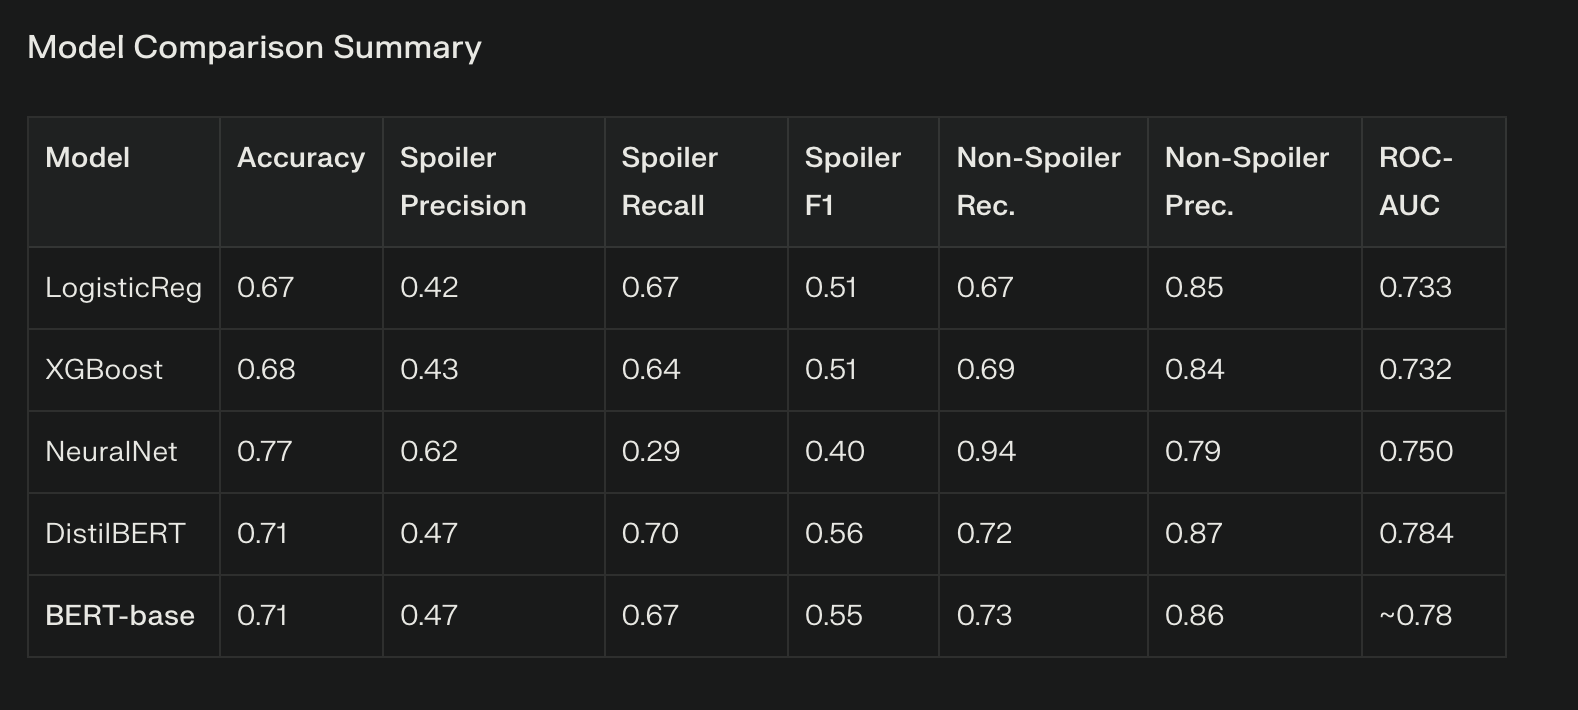

- BERT-base and DistilBERT both outperform classical models and neural nets in overall balance, capturing more true spoilers (recall 0.67–0.70 vs 0.29–0.67 for others) with similar precision (~0.47).
- Transformer models avoided the strong bias to the majority class found in the neural network (which got high non-spoiler recall but poor spoiler recall).
- Overall accuracy and ROC-AUC were similar for BERT-base, DistilBERT, and classical ML, but F1-score and recall for spoilers were notably better for transformer models.

  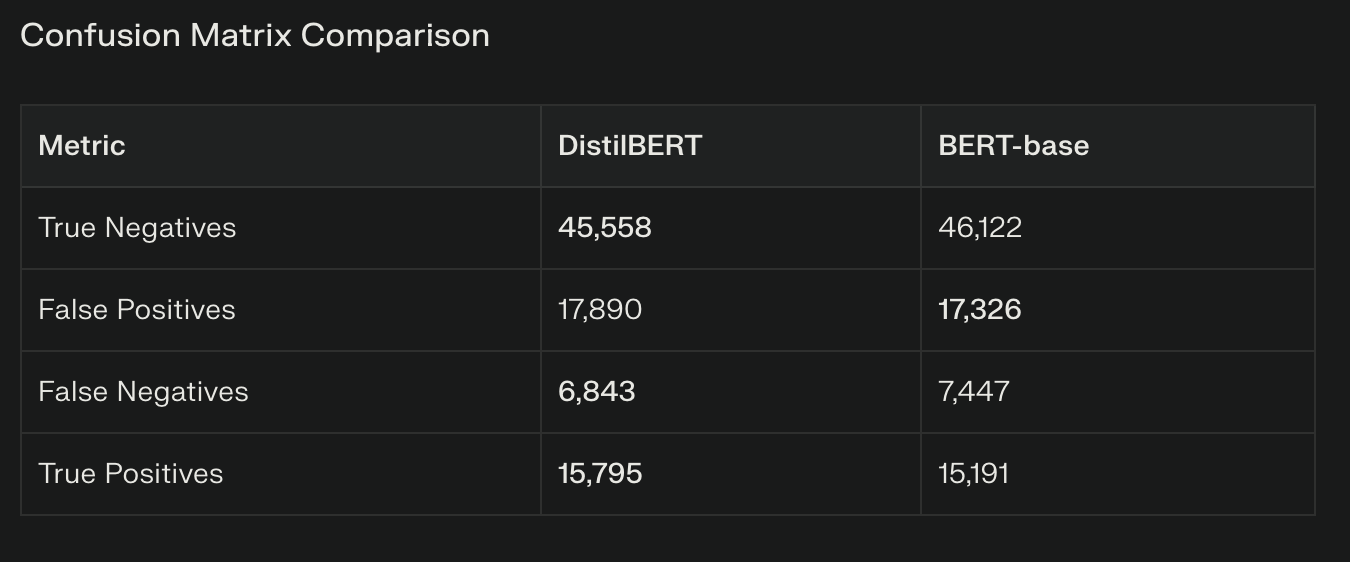
- Overall, DistilBERT is marginally better for capturing spoilers, while BERT-base is a bit better for non-spoiler discrimination.Given only 30% of data to both transformer models, we did not see much difference in both models. However if we run 50% or more, then we may see improvements in both models.

***Checklist***

Ensure that the following is done:

- The accuracy/precision/recall of the best model is at least between 60-70%
- Observe the context window for the model you pick because that will truncate the text input length & hence the context that the model will have. This ofcourse impacts the model performance. So you can look for larger BERT models from HuggingFace repo to increase the context length but the trade-off is more compute time & resources!

## Summary

Good work completing all the steps till now!

Now, go ahead and summarize your entire work and findings below:

- BERT-base and DistilBERT outperformed classical ML and standard neural networks in spoiler detection, achieving both high recall and balanced F1 for the minority (spoiler) class, while maintaining competitive accuracy. Classical models struggled with class imbalance, and neural nets favored the majority class, but both transformer-based models captured the nuanced context required for spoiler identification, making them the best choice for this task.
- Classical models appear competitive in overall accuracy due to class imbalance, but fall short on spoiler precision, recall, and F1—highlighting the value of transformer-based models for nuanced, minority-class detection.
- Transformer-based models (DistilBERT and BERT-base) performed as well or better than classical algorithms and neural networks, even when **trained on only 30% of the data**, while the classical and neural models **used the full dataset**. This highlights transformers’ superior contextual understanding and efficiency. 

### **Future Improvements(Optional)**
- **Approach-2 for Model Training**

Feel free to refer the below article to understand another approach for Bert finetuning which is using the trainer class from HuggingFace transformers. It abstracts the Pytorch loops & is more convenient but Pytorch loops provide more flexibility- https://github.com/philschmid/deep-learning-pytorch-huggingface/blob/main/training/pytorch-2-0-bert-text-classification.ipynb




---



---
- **Improving the Model Performance**:

  In the previous model training exercise, you had taken the entire dataset and randomly curated 25000 reviews. Now, randomly selecting reviews may not provide enough clear examples of spoilers, as most reviews, even of popular movies, might not include explicit spoilers. Selectively curating your dataset could significantly improve the model's performance. Here are some suggestions to improve the dataset for better spoiler detection:

  **Identify Top Movies**: Focus on movies with the most reviews, such as The Dark Knight, Shawshank Redemption, and The Godfather.

  **Class Distribution**: Check how many reviews fall under the Spoiler vs. Non-Spoiler classes.

  **Filter Reviews**: Only keep reviews within ~200-350 words. This ensures that longer reviews are used for better training but they’re not too long (to fit BERT's 512-token limit).

  **Target 10K Spoiler Reviews**: Select the top k movies whose Spoiler reviews add up to around 10,000.

  **Balanced Dataset**: After filtering, aim for a dataset where every Spoiler review has a matching Non-Spoiler review, resulting in 20,000 balanced data points.

  **Initial Model Inference**: Use these selected movies for initial model building. Adjust the business problem if needed.

  You can also build similar models by curating specific datasets to improve data quality. Accordingly you can see if the model performance is increasing or decreasing. However a warning: This may lead to your colab compute reducing drastically, hence build the models wisely.